# Análisis exploratorio de datos (EDA) de Sistema de bicicletas compartidas - 2011

<img src='./img/descarga.png' width='800px' height='100px'>

## Introducción

En este proyecto realizaremos un análisis exploratorio de datos utilizando Python, utilizando información de la biblioteca de datos UC Irvine Machine Learning Repository sobre el sistema de bicicletas compartidas del año 2011, que incluye información sobre la temperatura, fechas y tipo de clientes.

## Objetivos

Estudiar el comportamiento de los clientes en relación a  las estaciones del año. Se buscará a través del análisis estadístico un comportamiento anual de parte del cliente para lograr un trabajo más óptimo.

## Hipótesis

1. Existe una diferencia significativa en el uso promedio de biciletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).
2. Existe una diferencia en el promedio de uso entre las estaciones cálidas.
3. Existe una diferencia en el promedio de uso entre las estaciones frías.
4. ¿Cómo es el comportamiento por tipo de clientes según la temporada más alta?
5. ¿Cómo es el comportamiento por tipo de clientes según la temporada más baja?
6. ¿Cómo varía en promedio el uso de bicicletas mensualmente durante la temporada más alta?
7. ¿Cómo varía en promedio el uso de bicicletas mensualmente durante la temporada más baja?
8. ¿Cómo es el comportamiento por tipo de clientes el uso promedio de bicicletas durante los días de la semana de nuestra temporada de mayor frecuencia?
9. ¿Cómo es el comportamiento por tipo de clientes el uso promedio de bicicletas durante los días de la semana de nuestra temporada de menor frecuencia?


## Imporatción de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Importación de Dataset

In [3]:
df2011 = pd.read_csv('data/Dataset_clear_2011.csv')


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Análisis de datos

### Información general

 info, describe, si hay nulo, etc, algo del analisis uni, bi y multi

#### 1. Existe una diferencia significativa en el uso promedio de biciletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).

In [4]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,instant,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
0,1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
1,2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
2,3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
3,4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
4,5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8641,8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8642,8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio
8643,8644,2011-12-31,1,12,31,22,5,0,0,16.0,20.0,62.0,1,9.0,2,36,38,frio


In [5]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según la estación del año.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7054605.0, p_value = 4.7389111611635094e-86
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas


In [7]:
dfH1 = df2011.groupby('season')[['cnt']].mean().reset_index()
dfH1

,season,cnt
0,1,72.533849
1,2,157.655924
2,3,187.343750
3,4,152.828960


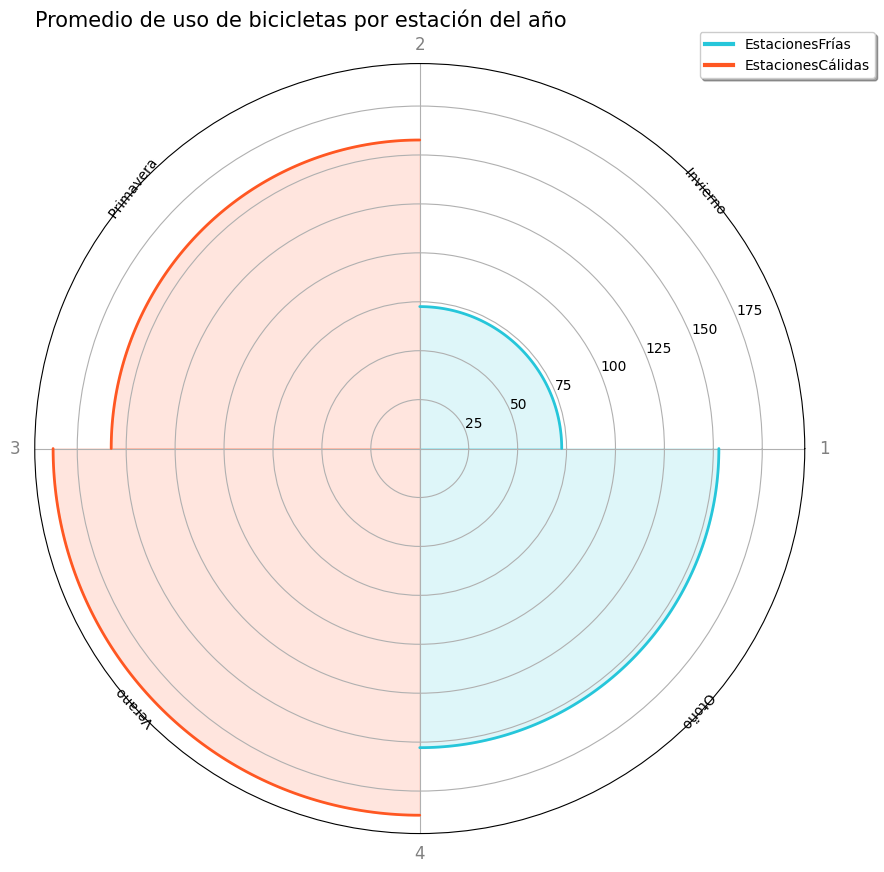

In [15]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

season = [1,2,3,4]

valores = [cant for cant in dfH1["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='grey', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['#26C6DA', '#FF5722', '#FF5722','#26C6DA']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.15)

    # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=2, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=3, linestyle='solid'))
    # # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='medium')

plt.legend(legend_lines, [f'Estaciones{s}' for s in ['Frías','Cálidas']], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='medium', shadow=True, labelcolor='black')

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


#### 2. Existe una diferencia en el promedio de uso entre las estaciones cálidas.

In [16]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según las estaciones primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2176360.5, p_value = 9.950643607180731e-12
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano


In [23]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
dfH2

,season,mnth,cnt
0,2,3,87.842308
1,2,4,131.947149
2,2,5,182.555108
3,2,6,195.387500
4,3,6,207.191667
5,3,7,189.974462
6,3,8,186.991792
7,3,9,175.032381


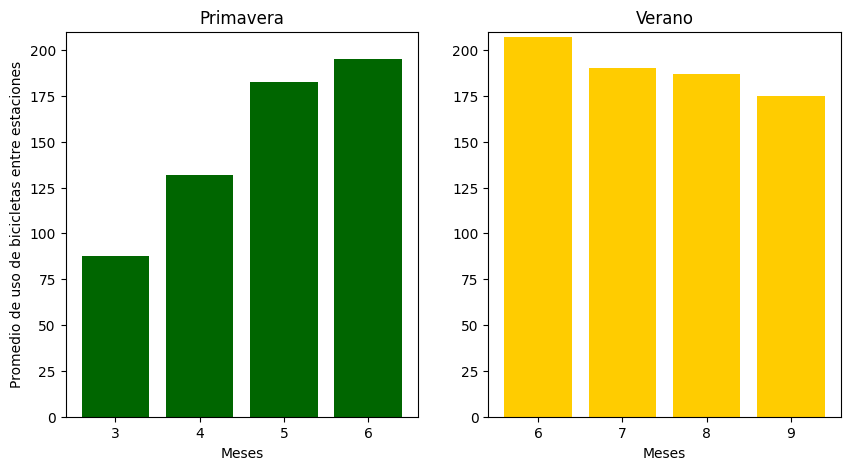

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x = dfH2.query('season == 2')['mnth']
y = dfH2.query('season == 2')['cnt']
axs[0].bar(x,y,color='#006600')
axs[0].set_title('Primavera')

axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 3')['mnth']
y1 = dfH2.query('season == 3')['cnt']
axs[1].bar(x1,y1,color='#FFCC00')
axs[1].set_title('Verano');

axs[1].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 210  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

#### 3. Existe una diferencia en el promedio de uso entre las estaciones frías.

In [22]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 1],
                                    df2011['cnt'][df2011['season'] == 4])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones inivierno y otoño.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según las estaciones inivierno y otoño.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1411373.5, p_value = 5.733279517481594e-91
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño


In [42]:
dfH3_1 = df2011.query('season == 1').groupby('mnth')['cnt'].mean().reset_index()
dfH3_2 = df2011.query('season == 4').groupby('mnth')['cnt'].mean().reset_index()

def desplazar_elementos(lista):
    # Guardar el último elemento en una variable temporal
    temp = lista[-1]
    # Desplazar los elementos hacia la derecha
    for i in range(len(lista)-1, 0, -1):
        lista[i] = lista[i-1]
    # Colocar el último elemento en la primera posición
    lista[0] = temp
    return lista

# Llamar a la función para desplazar los elementos
dfH3_1['mnth'] = desplazar_elementos(pd.Categorical(dfH3_1['mnth'], ordered=True))
dfH3_1['cnt'] = desplazar_elementos(list(dfH3_1['cnt']))

print(dfH3_1)
print(dfH3_2)

  mnth        cnt
0   12  85.785441
1    1  55.507267
2    2  74.291217
3    3  87.672340
   mnth         cnt
0     9  185.031250
1    10  166.232840
2    11  142.095967
3    12  135.277083


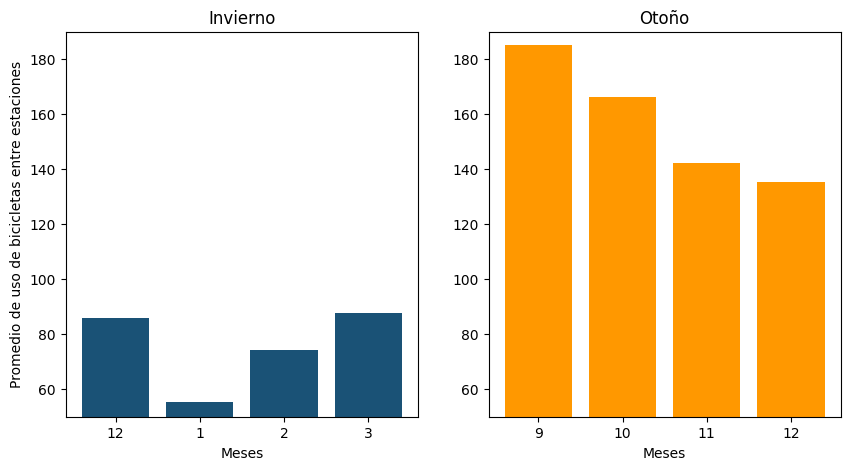

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = dfH3_1['mnth']
y = dfH3_1['cnt']
axs[0].bar(range(len(x)), y, color='#1A5276')
axs[0].set_title('Invierno')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones')
axs[0].set_xticks(range(len(x)))
axs[0].set_xticklabels(x)


x1 = dfH3_2['mnth']
y1 = dfH3_2['cnt']
axs[1].bar(x1, y1, color='#FF9800')
axs[1].set_title('Otoño');

axs[1].set_xlabel('Meses');

# y_combined = pd.concat([dfH3_1['cnt'], dfH3_2['cnt']])
# y_min, y_max = y_combined.min(), y_combined.max()
# axs[0].set_ylim(y_min, y_max)
# axs[1].set_ylim(y_min, y_max)

y_min = 50  # establecer el límite mínimo deseado
y_max = 190  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

#### 4. ¿Cómo es el comportamiento por tipo de clientes según la temporada más alta?

In [53]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1108205.0, p_value = 1.0516607051900278e-229
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.


In [56]:
dfH4 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH4

,mnth,casual,registered
0,6,42.970833,164.220833
1,7,48.994624,140.979839
2,8,39.455540,147.536252
3,9,37.796190,137.236190


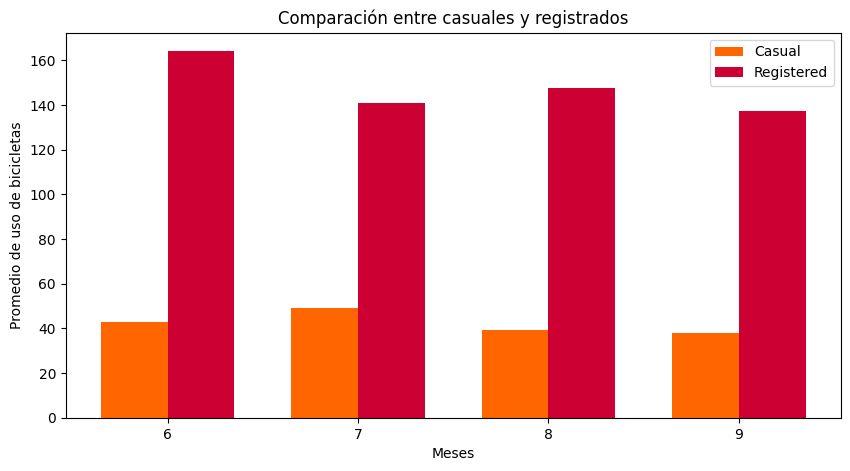

In [57]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH4['casual']
columna2_data = dfH4['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH4))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF6600')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH4['mnth'])
plt.legend()

# Muestra el gráfico
plt.show()

#### 5. ¿Cómo es el comportamiento por tipo de clientes según la temporada más baja?

In [59]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 1],
                                    df2011['registered'][df2011['season'] == 1])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de invierno.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 636154.0, p_value = 0.0
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.


In [61]:
dfH5 = df2011.query('season == 1').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5

,mnth,casual,registered
0,1,4.466570,51.040698
1,2,9.617874,64.673344
2,3,19.057447,68.614894
3,12,12.080460,73.704981


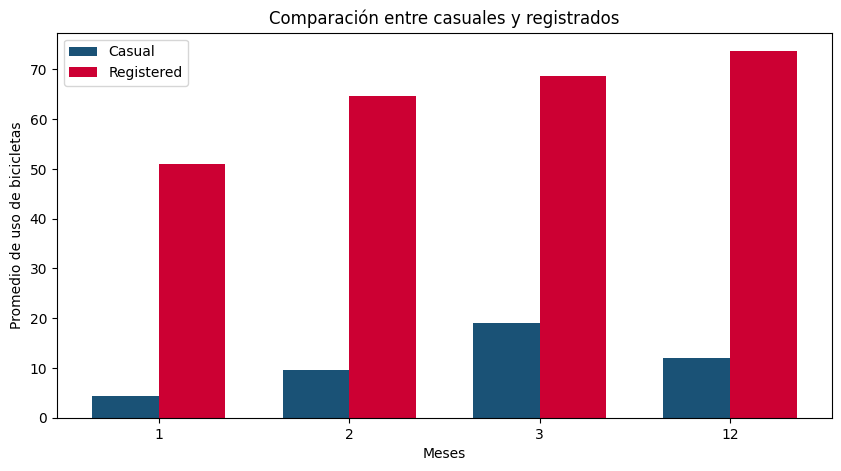

In [62]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH5['casual']
columna2_data = dfH5['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH5))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#1A5276')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH5['mnth'])
plt.legend()

# Muestra el gráfico
plt.show()

#### 6. ¿Cómo varía en promedio el uso de bicicletas mensualmente durante la temporada más alta?